### Problem 1: PCA

`lab03_dataset_1.csv` contains 205 observations on various vehicles. This is an unsupervised training data. You will use the entire dataset for the Principal Component Analysis.

### 1.a
For the 14 input features, drop any rows with missing numerical values and output the new length of the training dataset.

In [ ]:
# Import pandas
import pandas as pd

# Set up file path
file_path = "lab03_dataset_1.csv"

# Input file & handle missing values, add input columns to a list
as3 = pd.read_csv(file_path, na_values="?") # handle missings as "?"
input_features = as3.columns.tolist()
# print(input_features)

# Drop rows with missing values
as3_clean = as3.dropna(subset=input_features)

# Print the new length of training dataset
old_length = len(as3)
new_length = len(as3_clean)
print(f'Old length of the dataset: {old_length}\nNew length after dropping missing values: {new_length}')

Old length of the dataset: 205
New length after dropping missing values: 195


### 1.b
Normalize the dataset and generate the covariance matrix of the normalized dataset.

In [ ]:
# Import numpy
import numpy as np

# Normalize the dataset (z = (x−μ)/σ)
as3_normalized = (as3_clean[input_features] - as3_clean[input_features].mean()) / as3_clean[input_features].std()

# Calculate the covariance matrix of the normalized dataset
covariance_matrix = as3_normalized.cov()

# Print the covariance matrix
print("Covariance Matrix of the Normalized Dataset:")
print(covariance_matrix)

Covariance Matrix of the Normalized Dataset:
                   wheel-base    length     width    height  curb-weight  \
wheel-base           1.000000  0.879222  0.819009  0.592500     0.782720   
length               0.879222  1.000000  0.858084  0.496218     0.881665   
width                0.819009  0.858084  1.000000  0.315834     0.867315   
height               0.592500  0.496218  0.315834  1.000000     0.307732   
curb-weight          0.782720  0.881665  0.867315  0.307732     1.000000   
engine-size          0.569704  0.687479  0.740320  0.031286     0.857573   
bore                 0.498228  0.609437  0.544311  0.189283     0.645806   
stroke               0.171722  0.118664  0.186432 -0.055525     0.172785   
compression-ratio    0.247730  0.160172  0.190997  0.261160     0.155382   
horsepower           0.375541  0.583813  0.616779 -0.084412     0.760285   
peak-rpm            -0.352331 -0.280986 -0.251627 -0.264078    -0.278944   
city-mpg            -0.499126 -0.689660 -0.

### 1.c
Use `SVD` on the normalized dataset to obtain the 3 decomposed matrices and output them.

In [ ]:
# Import pandas, numpy
# import pandas as pd
# import numpy as np

# Perform SVD
U, S, VT = np.linalg.svd(as3_normalized, full_matrices=False)

# Convert S into a diagonal matrix
S_matrix = np.diag(S)

# Output the three decomposed matrices
print("Matrix U:")
print(U)
print("\nMatrix S (as a diagonal matrix):")
print(S_matrix)
print("\nMatrix V^T:")
print(VT)

Matrix U:
[[-0.0159953   0.10267409  0.01940005 ...  0.10111417 -0.04843851
   0.00862821]
 [-0.01288723  0.1039149   0.01612654 ...  0.07900948 -0.06227152
   0.02162727]
 [ 0.01158291  0.06476851 -0.09412247 ... -0.09826148 -0.02714196
  -0.06765328]
 ...
 [ 0.09001591  0.02356835  0.09522025 ...  0.02101279  0.11135799
  -0.06265885]
 [ 0.06078525 -0.14052582 -0.07337294 ... -0.08517798  0.00074339
   0.1394281 ]
 [ 0.08447437 -0.00542472  0.07082615 ... -0.03433806 -0.04111474
  -0.08342516]]

Matrix S (as a diagonal matrix):
[[38.22528237  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         21.02785779  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         15.36000706  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         

### 1.d
Generate the 3 largest eigenvalues from the decomposed matrices obtained from the `SVD`. Remember, eigenvalue $\lambda=\Lambda^2/n$

In [ ]:
# Calculate the eigenvalues
n = as3_normalized.shape[0]  # Number of samples
eigenvalues = (S ** 2) / n

# Get the 3 largest eigenvalues
largest_eigenvalues = eigenvalues[:3]

# Output the 3 largest eigenvalues
print("The 3 largest eigenvalues are:")
print(largest_eigenvalues)

The 3 largest eigenvalues are:
[7.49319083 2.26754258 1.2098965 ]


### 1.e
Generate the projections of the normalized dataset using the first 3 principal components obtained from the `SVD` and display it inside a DataFrame.

In [ ]:
# Get the first 3 principal components (first 3 columns of V^T)
top_eigenvalue = VT[:3].T  # Transpose to get a matrix of shape (features, 3)

# Project the normalized dataset onto the first 3 principal components
projections = np.dot(as3_normalized, top_eigenvalue)

# Create a DataFrame for the projections
projections_df = pd.DataFrame(projections, columns=["PC1", "PC2", "PC3"])

# Display the resulting DataFrame
print("Projections of the normalized dataset onto the first 3 principal components:")
print(projections_df)

Projections of the normalized dataset onto the first 3 principal components:
          PC1       PC2       PC3
0   -0.611425  2.159016  0.297985
1   -0.492618  2.185108  0.247704
2    0.442760  1.361943 -1.445722
3   -0.178522  0.255734 -0.066078
4    1.266544  1.164078 -0.018708
..        ...       ...       ...
190  2.593408 -0.419185  1.074241
191  3.439925  0.236195  1.023271
192  3.440884  0.495592  1.462584
193  2.323533 -2.954957 -1.127009
194  3.229057 -0.114070  1.087890

[195 rows x 3 columns]


### 1.f
Use `eigen decomposition` on the covariance matrix to compute and output the eigenvalues and eigenvectors.

In [ ]:
# Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Output the eigenvalues and eigenvectors
print("Eigenvalues of the covariance matrix:")
print(eigenvalues)
print("\nEigenvectors of the covariance matrix:")
print(eigenvectors)

Eigenvalues of the covariance matrix:
[7.53181553 2.27923094 1.21613308 0.90961519 0.60894217 0.4157043
 0.32059895 0.27014548 0.01969881 0.12030933 0.11060092 0.08158813
 0.06422049 0.05139667]

Eigenvectors of the covariance matrix:
[[-0.28820539  0.29182288 -0.12994231  0.24040455  0.04039015 -0.09104465
  -0.29280991 -0.29480758 -0.09232403  0.31803097 -0.40383755  0.35247887
  -0.40884789 -0.10187205]
 [-0.32846158  0.16336179 -0.12744458  0.14708138  0.00746205 -0.00328196
  -0.22826758 -0.01685486  0.16438874  0.44759966  0.27680872 -0.64714753
   0.17005108 -0.15292076]
 [-0.32387774  0.12579458  0.0515971   0.09327862 -0.12886681 -0.12363832
  -0.45853571 -0.19737255 -0.02259169 -0.66047755  0.36152498  0.09955421
   0.07695175 -0.05947995]
 [-0.1109331   0.39950597 -0.47616754  0.39155982  0.00161832  0.08195927
   0.60515036  0.02555923 -0.01202006 -0.1785461   0.16431334  0.09618862
   0.06889848 -0.03785127]
 [-0.35188704  0.06169051  0.05439206 -0.01531897 -0.05746168 -0.

### 1.g
Generate the projections of the normalized dataset using the first 3 principal components obtained from the `eigen decomposition` and display it inside a DataFrame.

In [ ]:
# Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
top_eigenvalues = eigenvalues[sorted_indices[:3]]
top_eigenvectors = eigenvectors[:, sorted_indices[:3]]

# Project the normalized dataset onto the first 3 principal components
projections = np.dot(as3_normalized, top_eigenvectors)

# Create a DataFrame for the projections
projections_df = pd.DataFrame(projections, columns=["PC1", "PC2", "PC3"])

# Display the resulting DataFrame
print("Projections of the normalized dataset onto the first 3 principal components:")
print(projections_df)

Projections of the normalized dataset onto the first 3 principal components:
          PC1       PC2       PC3
0    0.611425 -2.159016 -0.297985
1    0.492618 -2.185108 -0.247704
2   -0.442760 -1.361943  1.445722
3    0.178522 -0.255734  0.066078
4   -1.266544 -1.164078  0.018708
..        ...       ...       ...
190 -2.593408  0.419185 -1.074241
191 -3.439925 -0.236195 -1.023271
192 -3.440884 -0.495592 -1.462584
193 -2.323533  2.954957  1.127009
194 -3.229057  0.114070 -1.087890

[195 rows x 3 columns]


### 1.h
Are the projections generated from 1.e and 1.g the same? Yes, they are the same

In [ ]:
#1.e        PC1       PC2       PC3
# 0    0.611425 -2.159016 -0.297985
# 1    0.492618 -2.185108 -0.247704
# 2   -0.442760 -1.361943  1.445722
# 3    0.178522 -0.255734  0.066078
# 4   -1.266544 -1.164078  0.018708
# ..        ...       ...       ...
# 190 -2.593408  0.419185 -1.074241
# 191 -3.439925 -0.236195 -1.023271
# 192 -3.440884 -0.495592 -1.462584
# 193 -2.323533  2.954957  1.127009
# 194 -3.229057  0.114070 -1.087890

In [ ]:
#1.g        PC1       PC2       PC3
# 0    0.611425 -2.159016 -0.297985
# 1    0.492618 -2.185108 -0.247704
# 2   -0.442760 -1.361943  1.445722
# 3    0.178522 -0.255734  0.066078
# 4   -1.266544 -1.164078  0.018708
# ..        ...       ...       ...
# 190 -2.593408  0.419185 -1.074241
# 191 -3.439925 -0.236195 -1.023271
# 192 -3.440884 -0.495592 -1.462584
# 193 -2.323533  2.954957  1.127009
# 194 -3.229057  0.114070 -1.087890

 <font color='red'></font>

### Problem 2: Clustering

`lab03_dataset_2.csv` which contains 1440 observations with two input features `x1` and `x2`, generates 4 concentric rings. For this task, you will perform various clustering-related operations using the `sklearn clustering` module.

### 2.a

Apply `sklearn KMeans` on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `KMeans` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure your scatterplot uses `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot the `Silhouette score` against `K clusters`. Label the plot axes accordingly.

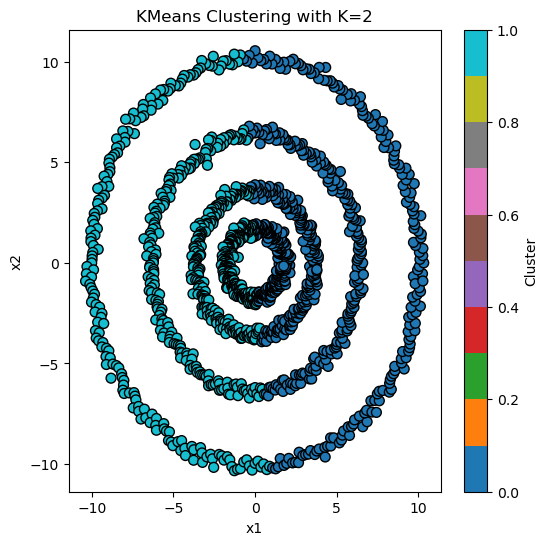

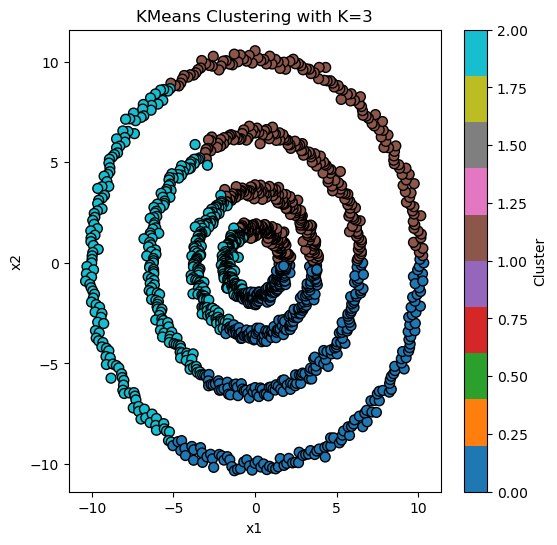

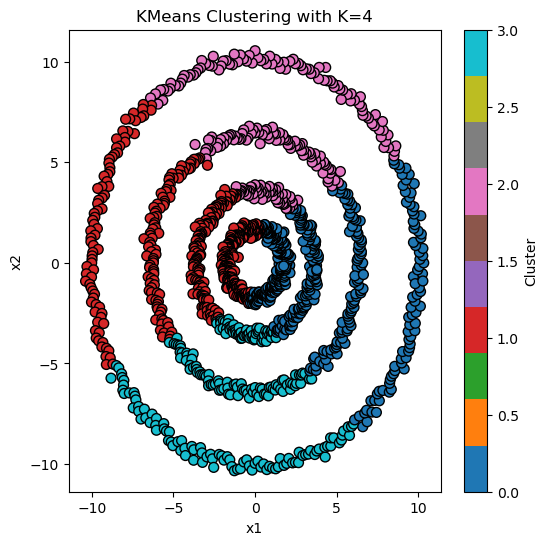

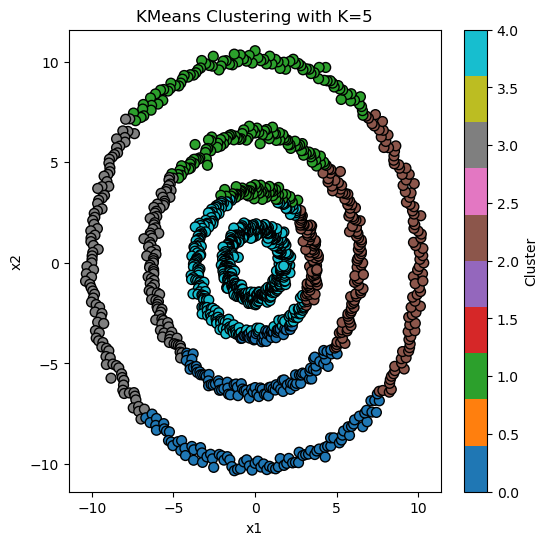

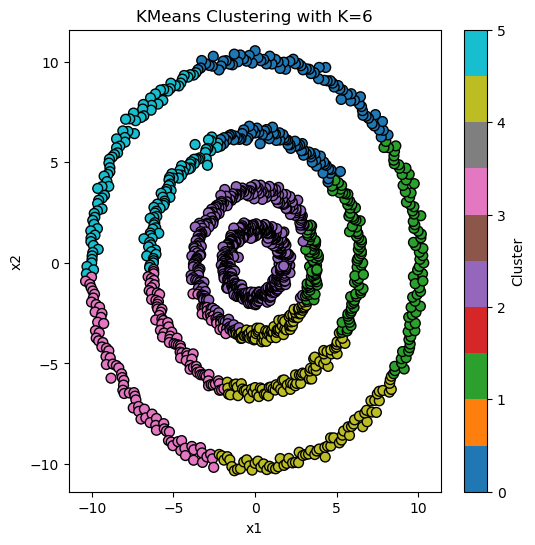

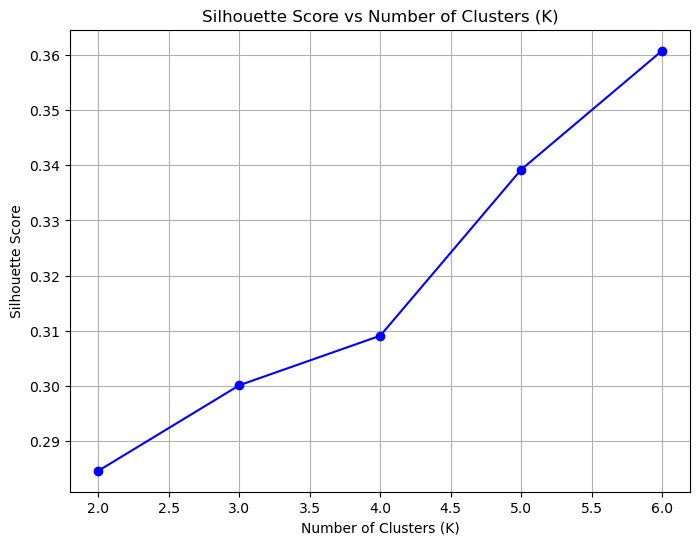

In [ ]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set up file path
file_path = "lab03_dataset_2.csv"
data = pd.read_csv(file_path)

# Define input features
input_features = ["x1", "x2"]
X = data[input_features]

# Initialize range for number of clusters
cluster_range = range(2, 7)

# Initialize list to store Silhouette scores
silhouette_scores = []

# Create scatterplots for each K and calculate Silhouette scores
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)

    # Calculate Silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    # Plot scatterplot for current K
    plt.figure(figsize=(6, 6))
    plt.scatter(X["x1"], X["x2"], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.title(f"KMeans Clustering with K={k}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar(label='Cluster')
    plt.show()

# Plot Silhouette score against number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### 2.b
Repeat all the tasks in 2.a, but instead use `SpectralClustering`.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


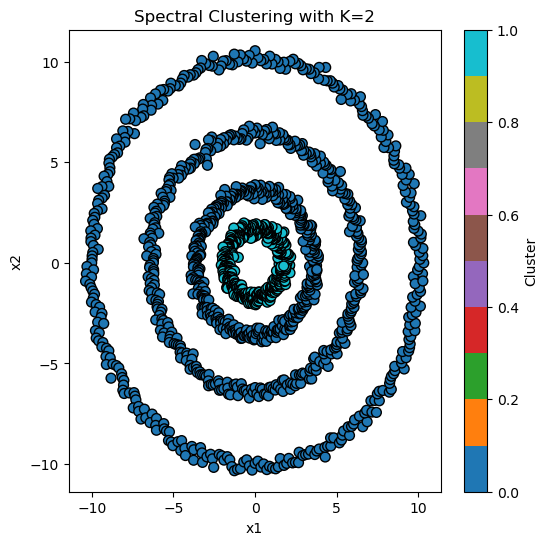

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


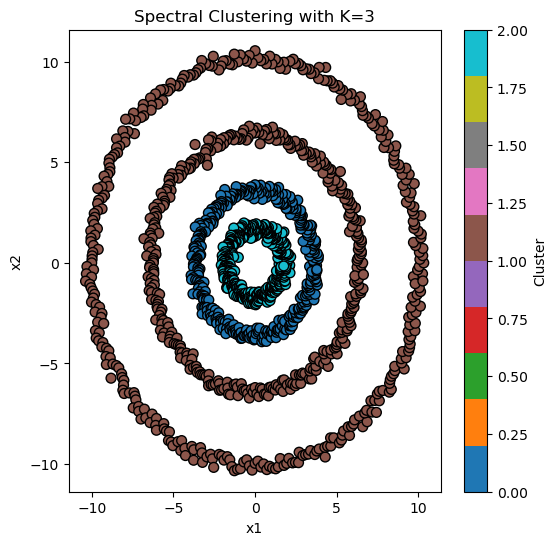

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


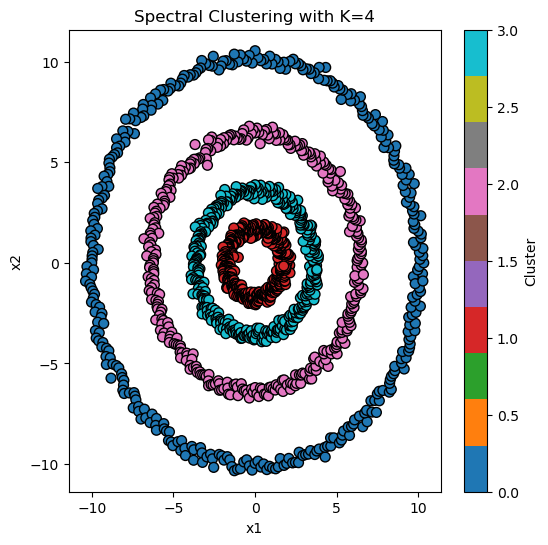

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


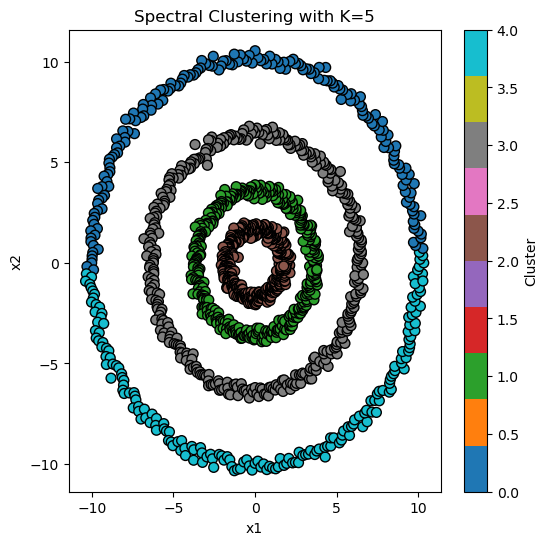

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


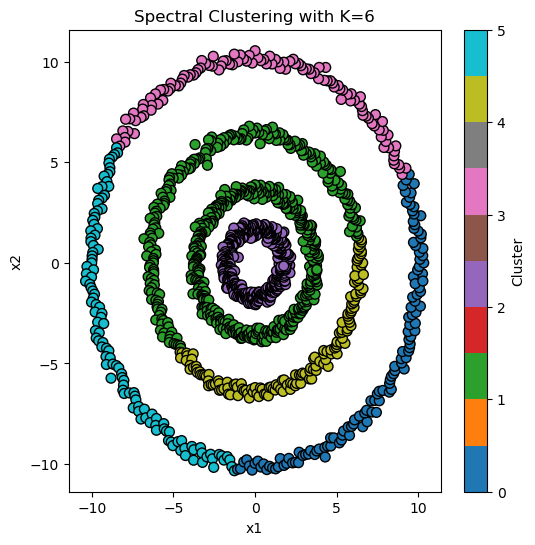

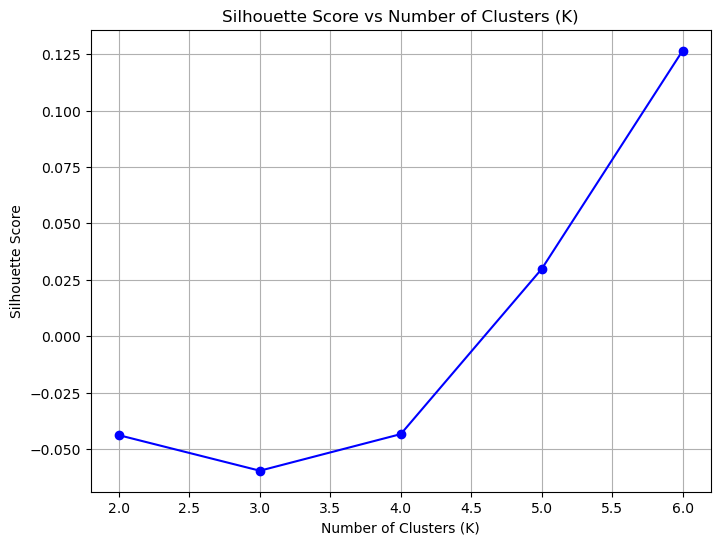

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set up file path
file_path = "lab03_dataset_2.csv"
data = pd.read_csv(file_path)

# Define input features
input_features = ["x1", "x2"]
X = data[input_features]

# Initialize range for number of clusters
cluster_range = range(2, 7)

# Initialize list to store Silhouette scores
silhouette_scores = []

# Perform Spectral Clustering for each K
for k in cluster_range:
    # Fit Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
    labels = spectral.fit_predict(X)

    # Calculate Silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    # Plot scatterplot for current K
    plt.figure(figsize=(6, 6))
    plt.scatter(X["x1"], X["x2"], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.title(f"Spectral Clustering with K={k}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar(label='Cluster')
    plt.show()

# Plot Silhouette score against number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### 2.c
Repeat all the tasks in 2.a, but instead use `GaussianMixture`.

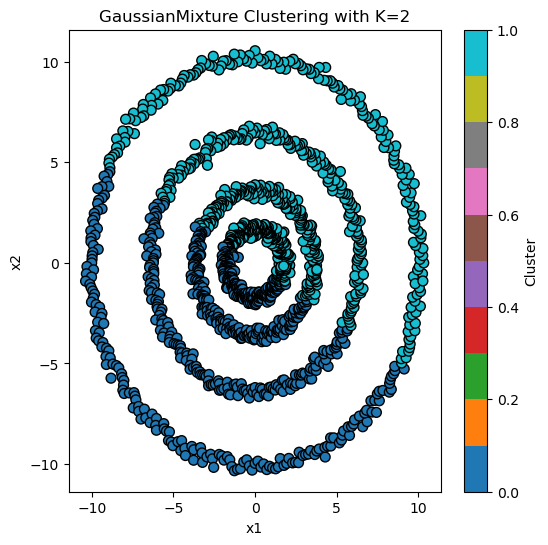

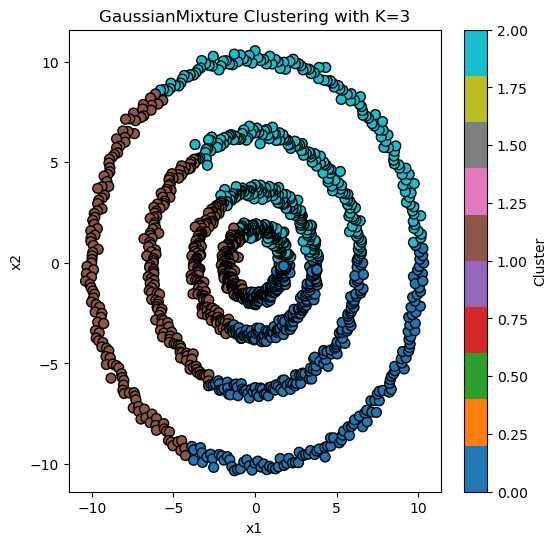

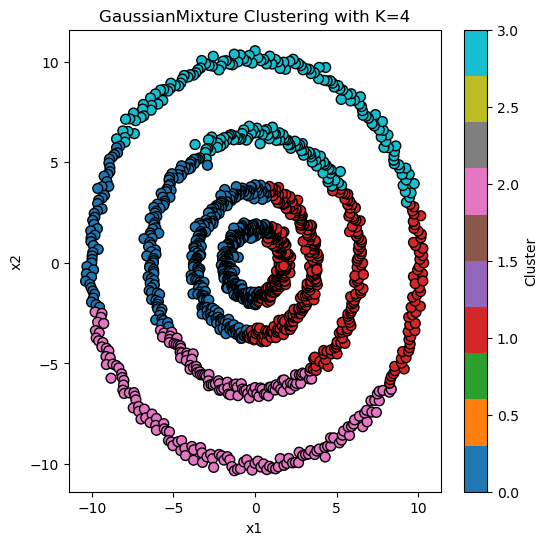

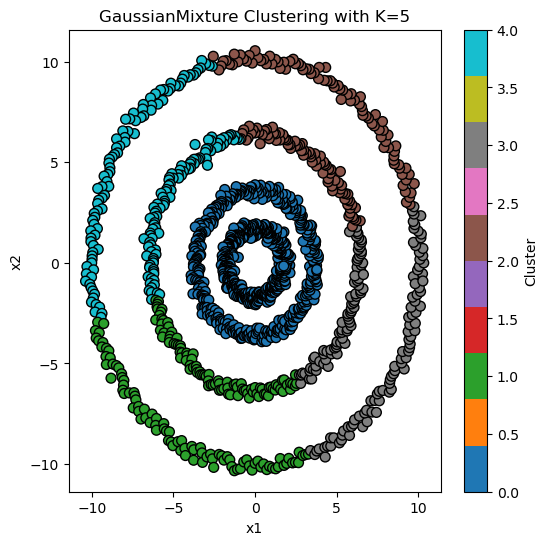

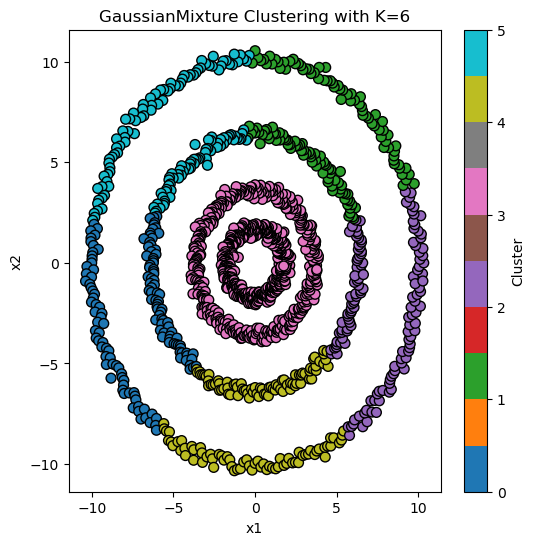

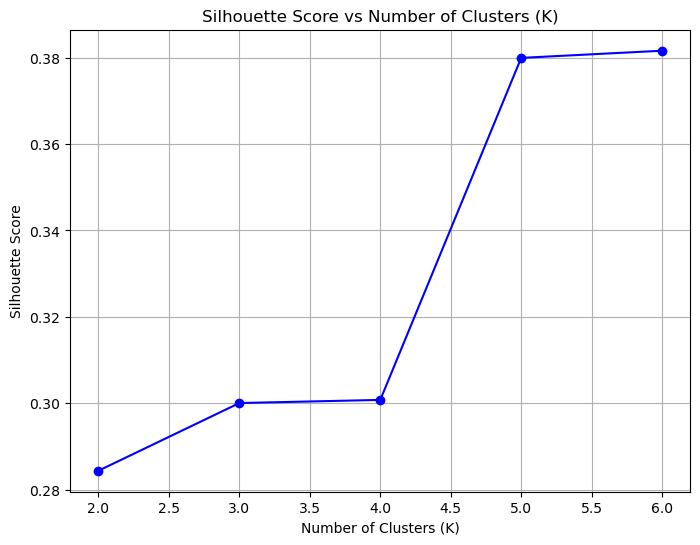

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set up file path
file_path = "lab03_dataset_2.csv"
data = pd.read_csv(file_path)

# Define input features
input_features = ["x1", "x2"]
X = data[input_features]

# Initialize range for number of clusters
cluster_range = range(2, 7)

# Initialize list to store Silhouette scores
silhouette_scores = []

# Perform GaussianMixture Clustering for each K
for k in cluster_range:

    # Fit GaussianMixture Clustering
    gaussianmixture = GaussianMixture(n_components=k)
    labels = gaussianmixture.fit_predict(X)

    # Calculate Silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    # Plot scatterplot for current K
    plt.figure(figsize=(6, 6))
    plt.scatter(X["x1"], X["x2"], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.title(f"GaussianMixture Clustering with K={k}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar(label='Cluster')
    plt.show()

# Plot Silhouette score against number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### 2.d
The dataset generates 4 concentric rings, so ideally we would want 4 clusters representing the 4 concentric rings. Did any of the clustering attempts in the above 3 tasks lead to 4 concentric ring clusters? Explore some other `sklearn clustering` algorithms to see which one can produce 4 clusters corresponding with the 4 concentric rings.

SpectralClustering, lead to four concentric ring clusters. Other sklearn clustering, (ie: AgglomerativeClustering, Birch, BisectingKMeans, FeatureAgglomeration, MiniBatchKMeans, SpectralBiclustering, SpectralCoclustering...), Maximum provide 3 concentric ring clusters, instead of 4.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


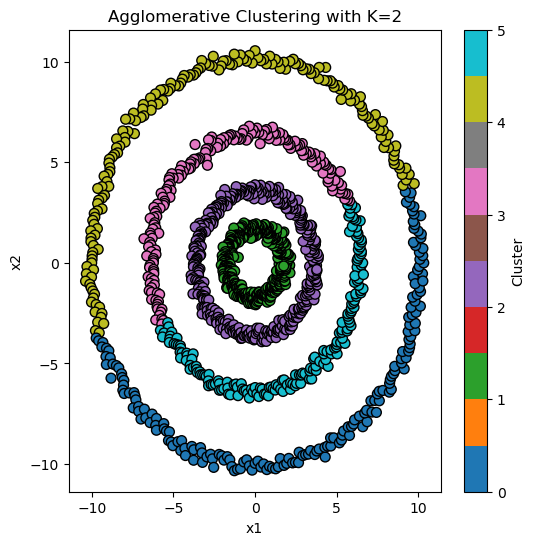

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


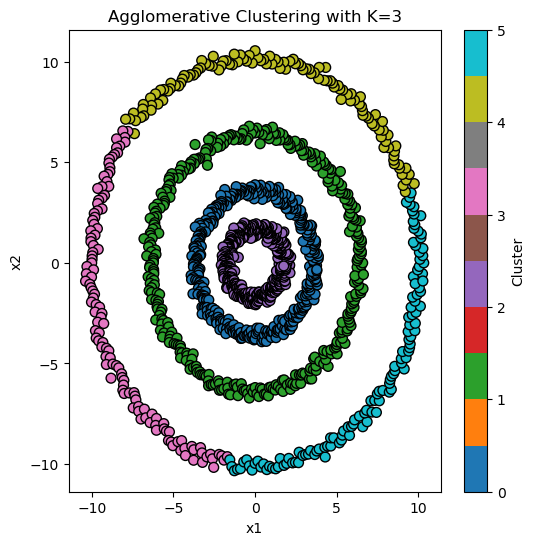

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


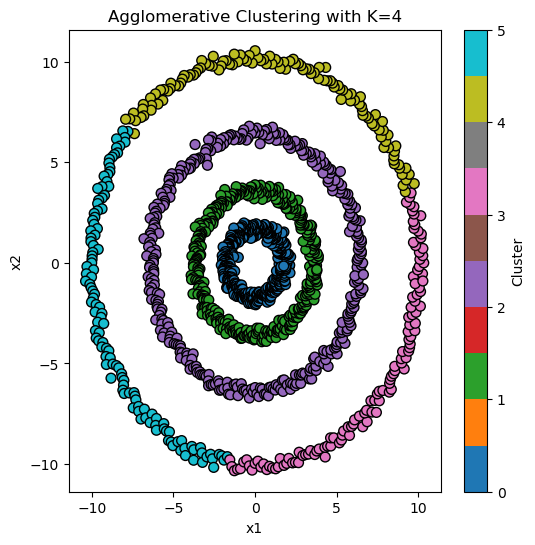

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


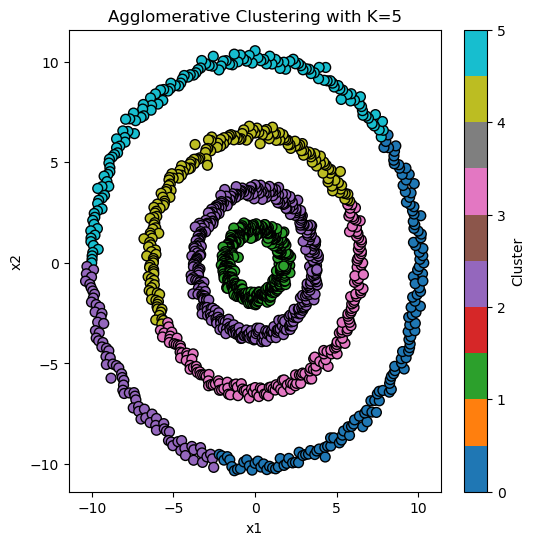

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


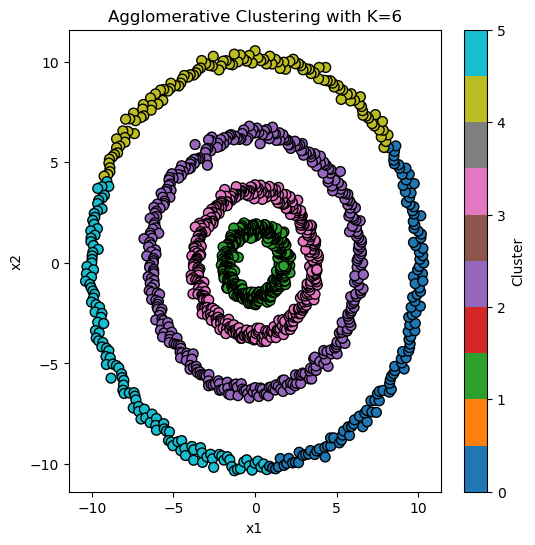

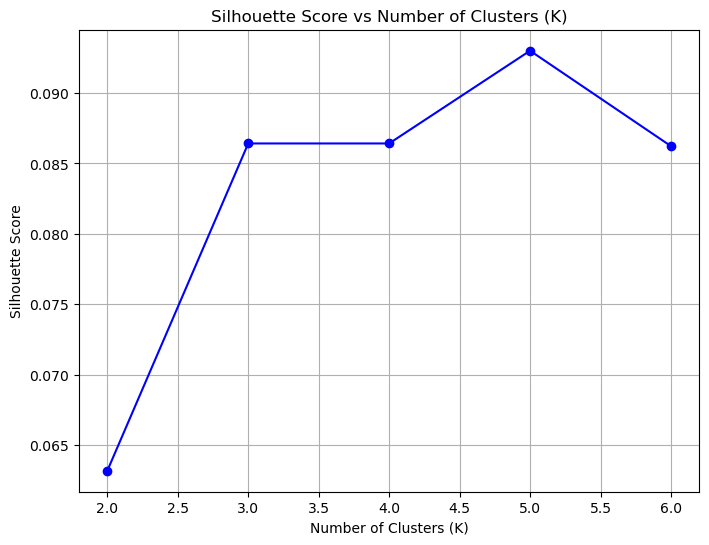

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, Birch, BisectingKMeans, FeatureAgglomeration, MiniBatchKMeans, SpectralBiclustering, SpectralCoclustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set up file path
file_path = "lab03_dataset_2.csv"
data = pd.read_csv(file_path)

# Define input features
input_features = ["x1", "x2"]
X = data[input_features]

# Initialize range for number of clusters
cluster_range = range(2, 7)

# Initialize list to store Silhouette scores
silhouette_scores = []

# Perform Different Clustering for each K
for k in cluster_range:
    # Fit Agglomerative Clustering (3 rings)
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = spectral.fit_predict(X)

    # Fit Birch (3 rings)
    # birch = Birch(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Fit BisectingKMeans (3 rings)
    # b_kmeans = BisectingKMeans(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Fit FeatureAgglomeration (3 rings)
    # f_agglomeration = FeatureAgglomeration(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Fit MiniBatchKMeans (3 rings)
    # minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Fit SpectralBiclustering (3 rings)
    # spectralbiclustering = SpectralBiclustering(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Fit SpectralCoclustering (3 rings)
    # spectralcoclustering = SpectralCoclustering(n_clusters=k)
    # labels = spectral.fit_predict(X)

    # Calculate Silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    # Plot scatterplot for current K
    plt.figure(figsize=(6, 6))
    plt.scatter(X["x1"], X["x2"], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.title(f"Agglomerative Clustering with K={k}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar(label='Cluster')
    plt.show()

# Plot Silhouette score against number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### Problem 3: MLP Classification

`lab03_dataset_3.csv` contains 103,904 observations on airlines customer reviews. For this classification task, use the `sklearn MLPClassifier` method, where the output class is the `Satisfaction` column which has a binary value of `Satisfied` or `Unsatisfied` and the remaining columns are the input features.

### 3.a
Drop any rows with missing values and output the new length of the final training dataset. Transform the data after applying encoding to convert all categorical features into numerical values. Normalize the input features and apply a train-test split of 70-30.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Set up file path & input
file_path = "lab03_dataset_3.csv"
as3 = pd.read_csv(file_path)

# Get all column names as a list
column_names = as3.columns.tolist()

# Drop "Satisfaction" & setup input list
input_features = [col for col in column_names if col != 'Satisfaction']
# print(input_features)

# Drop rows with missing values as requirement
as3_clean = as3.dropna(subset=input_features)

# Print the new length of training dataset
# old_length = len(as3)
new_length = len(as3_clean)
# print(f'Old length of the dataset: {old_length}\n')
print(f'New length after dropping missing values: {new_length}\n')

# Encode categorical features into numerical value
categorical_features = ['Gender', 'Customer', 'TravelType', 'Class', 'Satisfaction']
for feature in categorical_features:
    as3_clean[feature] = LabelEncoder().fit_transform(as3_clean[feature])
# print(as3_clean.head())

# Define input & output
x = as3_clean[input_features]
y = as3_clean['Satisfaction'] # output label

# Normalization
scaler = MinMaxScaler()
as3_clean[input_features] = scaler.fit_transform(as3_clean[input_features])

# Split the dataset into 70-30 train-test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

New length after dropping missing values: 103594

X_train shape: (72515, 22)
X_test shape: (31079, 22)
y_train shape: (72515,)
y_test shape: (31079,)


/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_1277/3055717773.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as3_clean[feature] = LabelEncoder().fit_transform(as3_clean[feature])
/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_1277/3055717773.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as3_clean[feature] = LabelEncoder().fit_transform(as3_clean[feature])
/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_1277/3055717773.py:30: SettingWithCopyWarning: 
A value i

### 3.b
Build a `MLPClassifier` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `ReLU` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

# Apply the MLPClassifier neural network
mlp_relu = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='relu'               # using the ReLU activation function
)

# Fit the model on the training data
mlp_relu.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_relu.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPClassifier with ReLU: {mse}")

Mean Squared Error (MSE) for MLPClassifier with ReLU: 0.08819460085588339


### 3.c
Repeat all the tasks in 3.b while using the `tanh` activation function.

In [ ]:
# Apply the MLPClassifier neural network
mlp_tanh = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='tanh'                # using the tanh activation function
)

# Fit the model on the training data
mlp_tanh.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_tanh.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPClassifier with tanh: {mse}")

Mean Squared Error (MSE) for MLPClassifier with tanh: 0.1056018533414846


### 3.d
Plot the training loss trajectory together for both the above neural network models generated using two different activation functions. Make sure to add legends and labels to your plot.

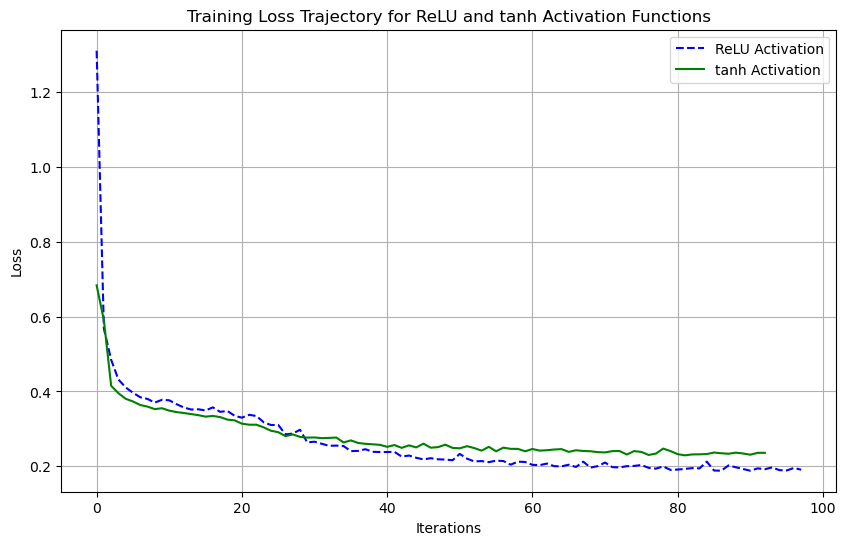

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract loss curves
loss_relu = mlp_relu.loss_curve_
loss_tanh = mlp_tanh.loss_curve_

# Plot the training loss trajectories
plt.figure(figsize=(10, 6))
plt.plot(loss_relu, label='ReLU Activation', linestyle='--', color='blue')
plt.plot(loss_tanh, label='tanh Activation', linestyle='-', color='green')
plt.title('Training Loss Trajectory for ReLU and tanh Activation Functions')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Problem 4: MLP Prediction

`lab03_dataset_4.csv` contains 973 observations on gym data. For this prediction task, use the `sklearn MLPRegressor` method, where the real-valued output feature is the `BMI` column and the remaining columns are the input features.

### 4.a
Transform the dataset after applying encoding to convert all categorical features into numerical values. Normalize the entire dataset (both the input and the output features) and apply a train-test split of 80-20.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'lab03_dataset_4.csv'
dataset = pd.read_csv(file_path)

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Workout_Type']
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Normalize the dataset
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset)

# Convert normalized data back to DataFrame for clarity
normalized_df = pd.DataFrame(normalized_data, columns=dataset.columns)

# Apply train-test split (80-20 split)
train_data, test_data = train_test_split(normalized_df, test_size=0.2)

# Display summary
print("First 5 rows of normalized dataset:")
print(normalized_df.head())
print("\nTraining data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

First 5 rows of normalized dataset:
        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  0.926829     1.0     0.537264        0.42  0.512821  0.755102     0.416667   
1  0.682927     0.0     0.388209        0.06  0.487179  0.632653     0.666667   
2  0.341463     0.0     0.312570        0.32  0.179487  0.040816     0.166667   
3  0.170732     1.0     0.146830        0.40  0.769231  0.897959     0.250000   
4  0.487805     1.0     0.067853        0.58  0.717949  0.775510     0.750000   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                  0.793333         0.682432      1.000000           0.104   
1                  0.533333         0.391892      0.333333           0.956   
2                  0.406667         0.252703      0.000000           0.936   
3                  0.060000         0.154730      0.666667           0.752   
4                  0.093333         0.170946      0.666667           0.768   

   Water

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Set up file path & input
file_path = "lab03_dataset_4.csv"
as3 = pd.read_csv(file_path)

# Get all column names, Drop "BMI" & setup input list
column_names = as3.columns.tolist()
input_features = [col for col in column_names if col != 'BMI']
# print(input_features)

# Drop rows with missing values & print missing count, if any
as3_clean = as3.dropna(subset=input_features)

old_length = len(as3)
new_length = len(as3_clean)
# print(f'Missing count of dataset: {old_length - new_length}')

# Encode categorical features ['Gender', 'Workout_Type'], into numerical value
as3_clean['Gender'] = LabelEncoder().fit_transform(as3_clean['Gender'])
as3_clean['Workout_Type'] = LabelEncoder().fit_transform(as3_clean['Workout_Type'])
# print(as3_clean.head())

# Define input & output
x = as3_clean[input_features]
y = as3_clean['BMI'] # output label

# Normalization of both input and output
scaler = MinMaxScaler()
as3_clean = scaler.fit_transform(as3_clean)

# Split the dataset into 80-20 train-test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# # Print the shapes of the resulting datasets
# print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'y_test shape: {y_test.shape}')

# Display summary
print("First 5 rows of normalized dataset:")
print(normalized_df.head())
print("\nTraining data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

First 5 rows of normalized dataset:
        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  0.926829     1.0     0.537264        0.42  0.512821  0.755102     0.416667   
1  0.682927     0.0     0.388209        0.06  0.487179  0.632653     0.666667   
2  0.341463     0.0     0.312570        0.32  0.179487  0.040816     0.166667   
3  0.170732     1.0     0.146830        0.40  0.769231  0.897959     0.250000   
4  0.487805     1.0     0.067853        0.58  0.717949  0.775510     0.750000   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                  0.793333         0.682432      1.000000           0.104   
1                  0.533333         0.391892      0.333333           0.956   
2                  0.406667         0.252703      0.000000           0.936   
3                  0.060000         0.154730      0.666667           0.752   
4                  0.093333         0.170946      0.666667           0.768   

   Water

### 4.b
Build a `MLPRegressor` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `tanh` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Apply the MLPRegressor neural network
mlpR_tanh = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='tanh',                # using the tanh activation function
    max_iter=1200                     # increase iterations (limitation reached during trying)
)

# Fit the model on the training data
mlpR_tanh.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlpR_tanh.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPRegressor with tanh: {mse}")

Mean Squared Error (MSE) for MLPRegressor with tanh: 42.96184833112672


### 4.c
Repeat all the tasks in 4.b while using the `sigmoid` activation function.

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Apply the MLPRegressor neural network
mlpR_sigmoid = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='logistic',             # using the sigmoid activation function (‘logistic’, the logistic sigmoid function)
    max_iter=1200                     # increase iterations (limitation reached during trying)
)

# Fit the model on the training data
mlpR_sigmoid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlpR_sigmoid.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPRegressor with sigmoid: {mse}")

Mean Squared Error (MSE) for MLPRegressor with sigmoid: 42.96180195741933


### 4.d
Plot the training loss trajectory together for both the above neural network models generated using two different activation functions. Make sure to add legends and labels to your plot.

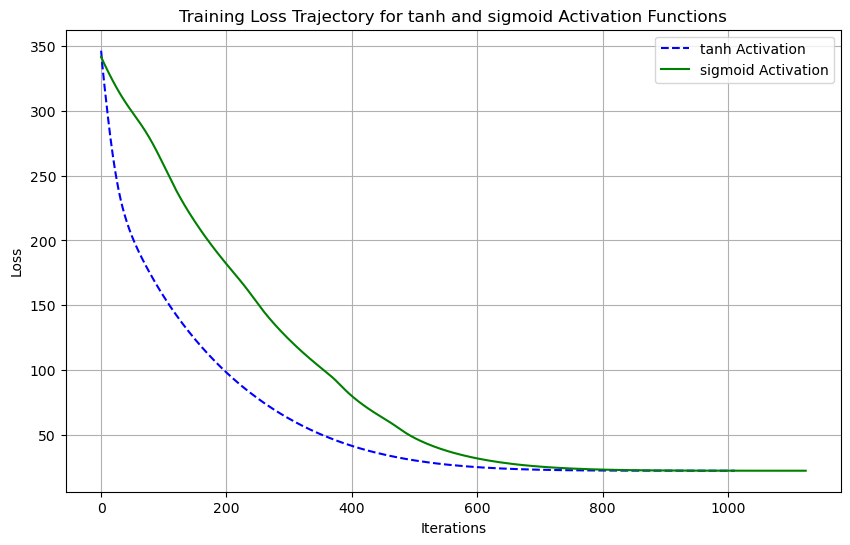

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract loss curves
R_loss_tanh = mlpR_tanh.loss_curve_
R_loss_sigmoid = mlpR_sigmoid.loss_curve_

# Plot the training loss trajectories
plt.figure(figsize=(10, 6))
plt.plot(R_loss_tanh, label='tanh Activation', linestyle='--', color='blue')
plt.plot(R_loss_sigmoid, label='sigmoid Activation', linestyle='-', color='green')
plt.title('Training Loss Trajectory for tanh and sigmoid Activation Functions')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 4.e
Using the `sklearn PCA` method, compute all the principal components (PCs) of the normalized dataset. All the PCs capture a fraction of the total variance, output all the variances captured by all the PCs. Write a code snippet that checks all the PCs and selects the `top k PCs` whose total variance captured is more than `70%`. What did `k` come out to be?

Top k PCs >= 70% variance: 5

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(as3_clean) # as3_clean is the normalized dataset (4.a)
                    # scaler = MinMaxScaler()
                    # as3_clean = scaler.fit_transform(as3_clean)

# Variance ratios for each principal component
variance_ratios = pca.explained_variance_ratio_

# Top k PCs >= 70% variance
cumulative_variance = variance_ratios.cumsum()
k = (cumulative_variance >= 0.7).argmax() + 1  # Add 1 since index starts at 0

# Print results
print("Variance captured by each PC:\n", variance_ratios, "\n")
print("Cumulative variance captured:\n", cumulative_variance, "\n")
print(f"\nTop k PCs >= 70% variance: {k}")

Variance captured by each PC:
 [2.74541843e-01 2.08340051e-01 1.04721203e-01 7.22467781e-02
 6.85364847e-02 6.52524231e-02 6.18114004e-02 4.63918169e-02
 2.94876112e-02 2.30807773e-02 1.94033500e-02 1.49773439e-02
 1.06822630e-02 3.31382720e-04 1.95272168e-04] 

Cumulative variance captured:
 [0.27454184 0.48288189 0.5876031  0.65984987 0.72838636 0.79363878
 0.85545018 0.901842   0.93132961 0.95441039 0.97381374 0.98879108
 0.99947335 0.99980473 1.        ] 


Top k PCs >= 70% variance: 5


### 4.f
Using the `top k PCs`, apply `dimensionality reduction` on the normalized dataset to generate the transformed dataset which should now have only `k columns`. This newly transformed dataset is the new input features which will be used for training. Continue using the same normalized output feature column. Generate a train-test split of 80-20 from this new dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Set up file path & input
file_path = "lab03_dataset_4.csv"
as3 = pd.read_csv(file_path)

# Get all column names, Drop "BMI" & setup input list
column_names = as3.columns.tolist()
input_features = [col for col in column_names if col != 'BMI']

# Drop rows with missing values & print missing count, if any
as3_clean = as3.dropna(subset=input_features)

# Encode categorical features into numerical values
as3_clean['Gender'] = LabelEncoder().fit_transform(as3_clean['Gender'])
as3_clean['Workout_Type'] = LabelEncoder().fit_transform(as3_clean['Workout_Type'])

# Define input (keep all columns except BMI) & output (BMI)
x = as3_clean[input_features]
y = as3_clean['BMI']  # Output label

# Normalize input & output
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

# Apply PCA with the top k components = 5
k = 5
pca_k = PCA(n_components=k)
transformed_data = pca_k.fit_transform(x_normalized)

# New DataFrame for the transformed dataset with k columns
transformed_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(k)])

# Add normalized output ('BMI') to the transformed dataset
transformed_df['BMI'] = y_normalized.flatten()

# Define input & output
X_4f = transformed_df.drop('BMI', axis=1)
y_4f = transformed_df['BMI']  # output label

# Split the dataset into 80-20 train-test
X_4f_train, X_4f_test, y_4f_train, y_4f_test = train_test_split(X_4f, y_4f, test_size=0.2)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_4f_train.shape}')
print(f'X_test shape: {X_4f_test.shape}')
print(f'y_train shape: {y_4f_train.shape}')
print(f'y_test shape: {y_4f_test.shape}')

X_train shape: (778, 5)
X_test shape: (195, 5)
y_train shape: (778,)
y_test shape: (195,)


### 4.g
Using the newly obtained transformed dataset, redo tasks 4.b and 4.c to obtain the `mean squared error` for both the neural network models.

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Apply the MLPRegressor neural network
mlpR_tanh_4f = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='tanh',                # using the tanh activation function
    max_iter=1200                     # increase iterations (limitation reached during trying)
)

# Fit the model on the training data
mlpR_tanh_4f.fit(X_4f_train, y_4f_train)

# Make predictions on the test data
y_4f_pred = mlpR_tanh_4f.predict(X_4f_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_4f_test, y_4f_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPRegressor with tanh(4f): {mse}")

Mean Squared Error (MSE) for MLPRegressor with tanh(4f): 0.031234832164248556


In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Apply the MLPRegressor neural network
mlpR_sigmoid_4f = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),  # 3 hidden layers with 10 neurons each
    activation='logistic',             # using the sigmoid activation function (‘logistic’, the logistic sigmoid function)
    max_iter=1200                     # increase iterations (limitation reached during trying)
)

# Fit the model on the training data
mlpR_sigmoid_4f.fit(X_4f_train, y_4f_train)

# Make predictions on the test data
y_4f_pred = mlpR_sigmoid_4f.predict(X_4f_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_4f_test, y_4f_pred)

# Output MSE
print(f"Mean Squared Error (MSE) for MLPRegressor with sigmoid(4f): {mse}")

Mean Squared Error (MSE) for MLPRegressor with sigmoid(4f): 0.034490259610053094


### 4.h
Repeat task 4.d to plot the training loss trajectory for both the neural network models.

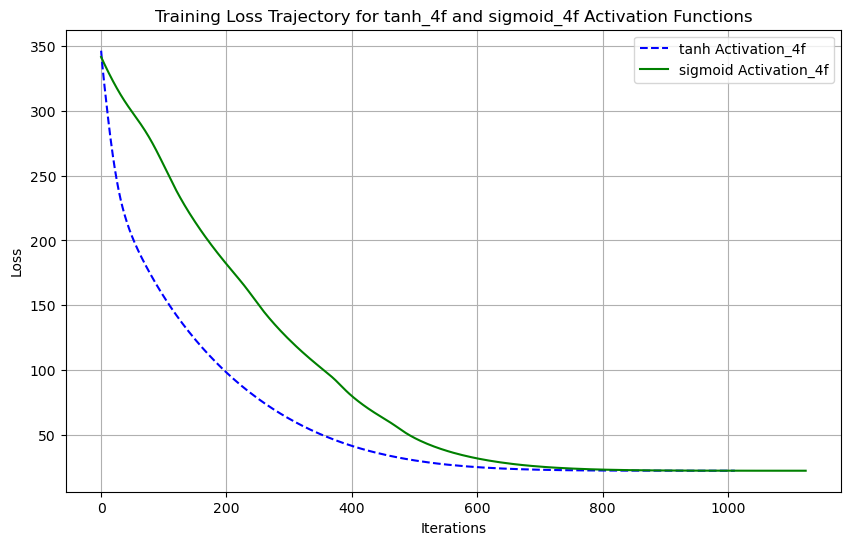

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract loss curves
R_loss_tanh_4f = mlpR_tanh_4f.loss_curve_
R_loss_sigmoid_4f = mlpR_sigmoid_4f.loss_curve_

# Plot the training loss trajectories
plt.figure(figsize=(10, 6))
plt.plot(R_loss_tanh, label='tanh Activation_4f', linestyle='--', color='blue')
plt.plot(R_loss_sigmoid, label='sigmoid Activation_4f', linestyle='-', color='green')
plt.title('Training Loss Trajectory for tanh_4f and sigmoid_4f Activation Functions')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()